Problem 1: Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [21]:
#Read the data
cars = pd.read_csv("ToyotaCorolla.csv")
#cars.head()


In [22]:
cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [23]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [24]:
Co=cars[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [25]:
Co

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [26]:
Co.shape

(1436, 9)

In [27]:
#check for missing values
Co.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [28]:
#Count of duplicated rows
Co[Co.duplicated()].shape

(1, 9)

In [29]:
#Print the duplicated rows
Co[Co.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [30]:
Co=Co.drop_duplicates()

In [31]:
Co.shape

(1435, 9)

In [32]:
Co.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


### Correlation Matrix

In [33]:
Co.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


### If r value is near to 1 between the independent variables, then the varibales are strongly collinear.

### Scatterplot between variables along with histograms

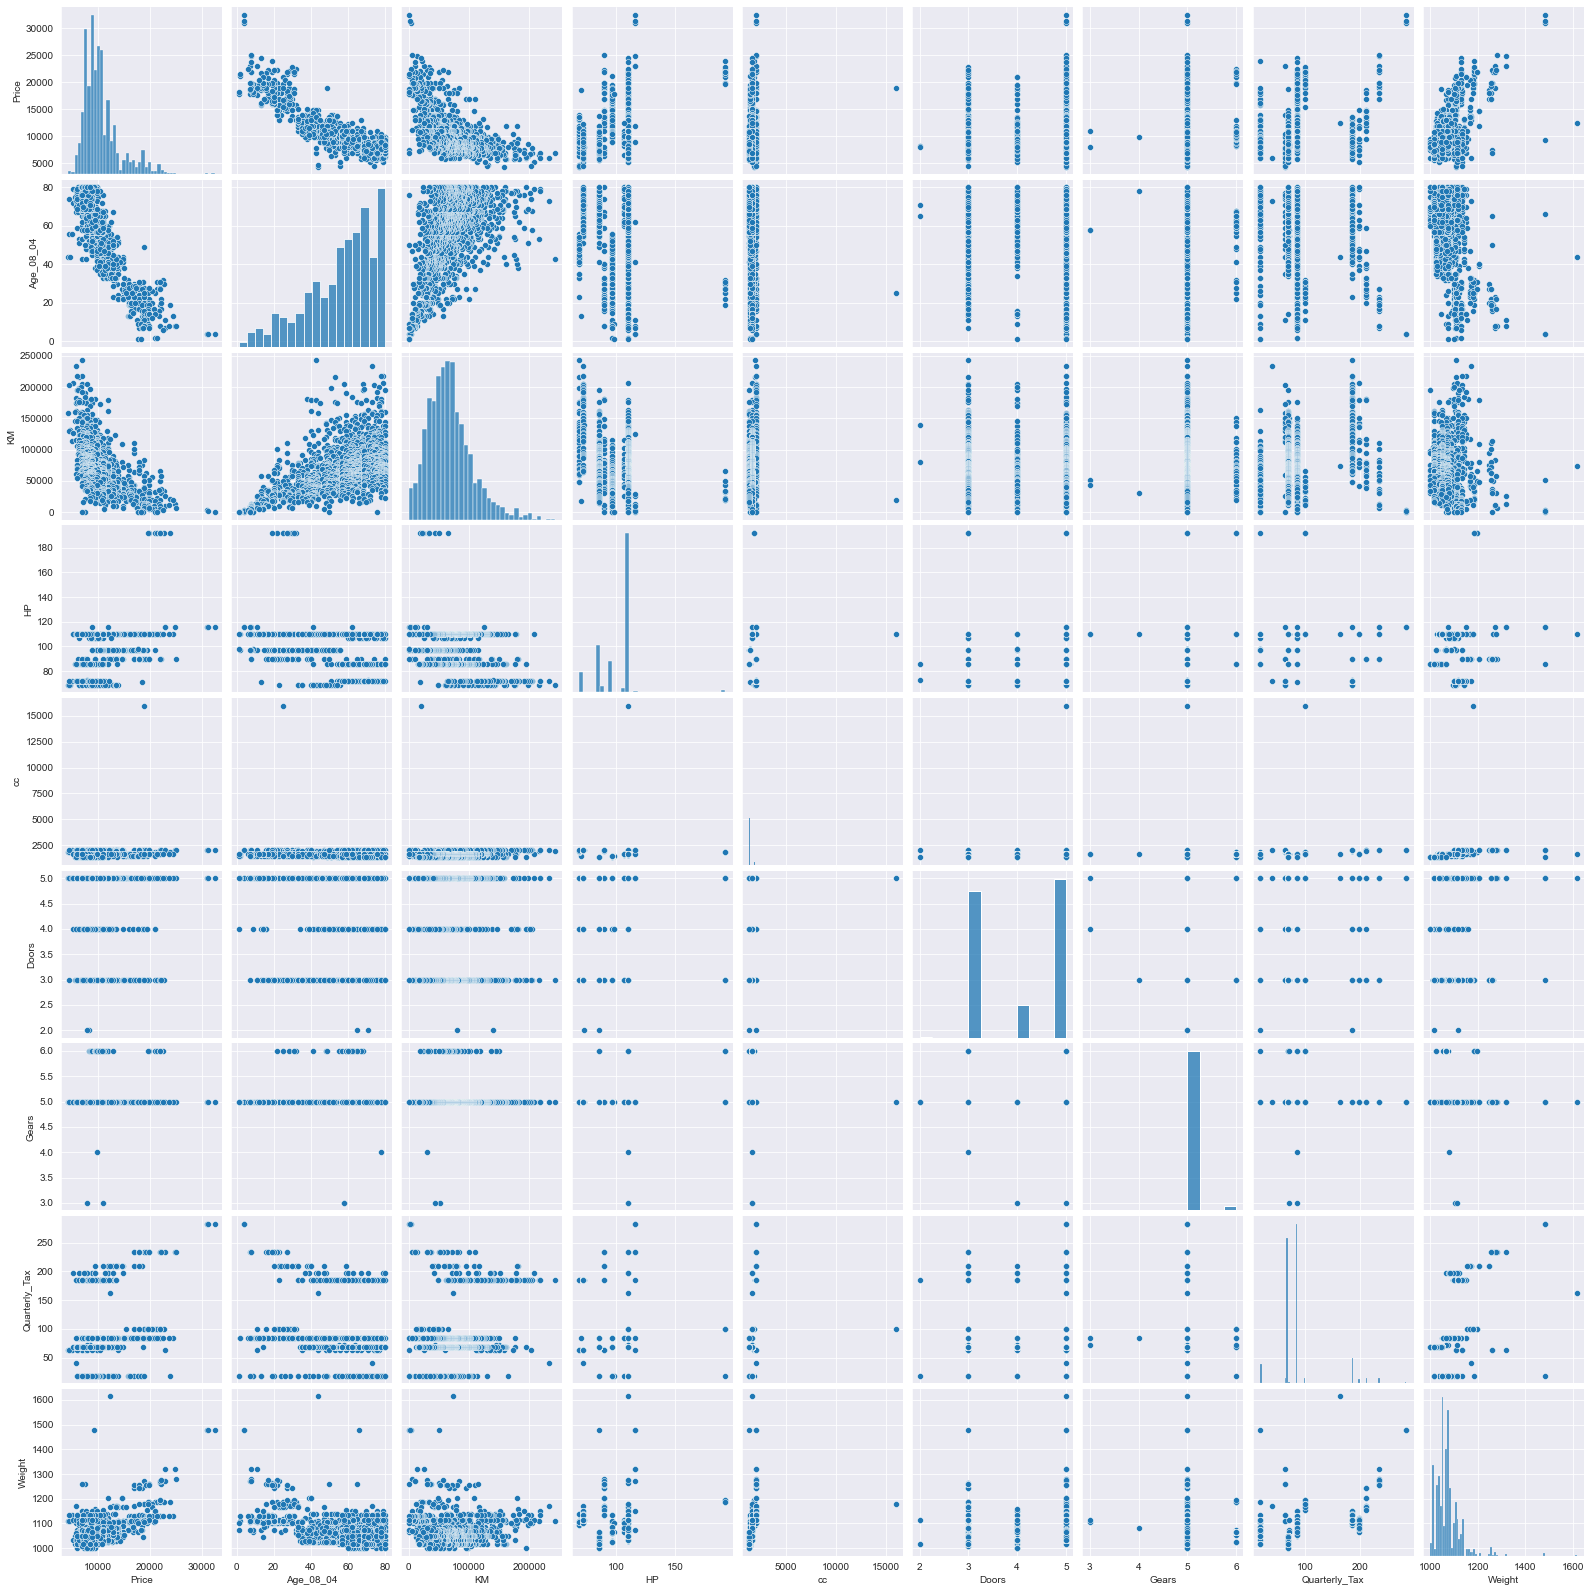

In [34]:
sns.set_style(style='darkgrid')
sns.pairplot(Co)

### From plots, we can say that no varibles are collinear because there is no strong linear plot between the independent variables.


## Preparing a model¶

In [35]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Co).fit()

In [36]:
#Coefficients
model.params

Intercept       -5472.540368
Age_08_04        -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [37]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.875273
Age_08_04       -46.551876
KM              -16.552424
HP               11.209719
cc               -1.316436
Doors            -0.023012
Gears             3.034563
Quarterly_Tax     2.944198
Weight           15.760663
dtype: float64 
 Intercept         1.113392e-04
Age_08_04        1.879217e-288
KM                1.994713e-56
HP                5.211155e-28
cc                1.882393e-01
Doors             9.816443e-01
Gears             2.452430e-03
Quarterly_Tax     3.290363e-03
Weight            1.031118e-51
dtype: float64


In [38]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

### R^2 value is near to 1 so price is strongly linear with the other independent variables, but there is still scope for the improve model.

## Calculating VIF

In [39]:
rsq_Price= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Co).fit().rsquared  
vif_Price = 1/(1-rsq_Price)

In [40]:
vif_Price

7.273786637312813

In [41]:
rsq_Age= smf.ols('Age_08_04~Price+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Co).fit().rsquared  
vif_Age = 1/(1-rsq_Age)

In [42]:
vif_Age

4.727531675851235

In [43]:
rsq_KM= smf.ols('KM~Age_08_04+Price+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Co).fit().rsquared  
vif_KM = 1/(1-rsq_KM)

In [44]:
vif_KM

2.0947912443981727

In [45]:
rsq_HM= smf.ols('HP~KM+Age_08_04+Price+cc+Doors+Gears+Quarterly_Tax+Weight',data=Co).fit().rsquared  
vif_HM = 1/(1-rsq_HM)

In [46]:
vif_HM

1.5442369367889315

### Variance Inflation factor (VIF) is less than the 20, so  there is no collinear variables.

## Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

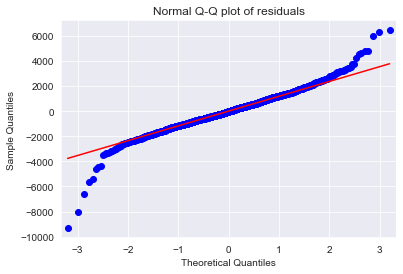

In [47]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [48]:
list(np.where(model.resid>4000))

[array([ 109,  110,  111,  124,  146,  170,  522, 1057])]

## Residual Vs Regressors

In [49]:
Co.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

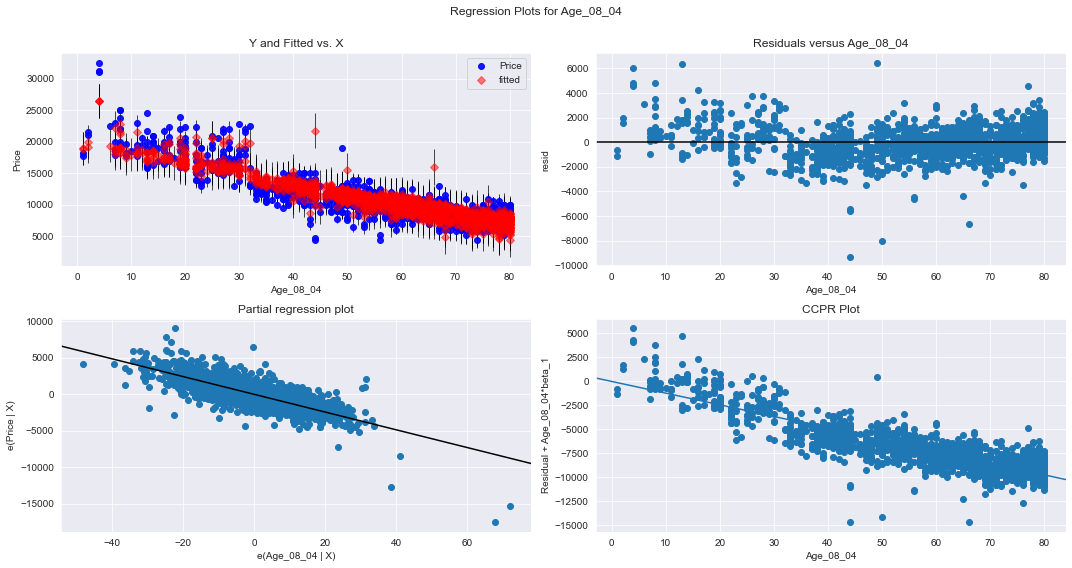

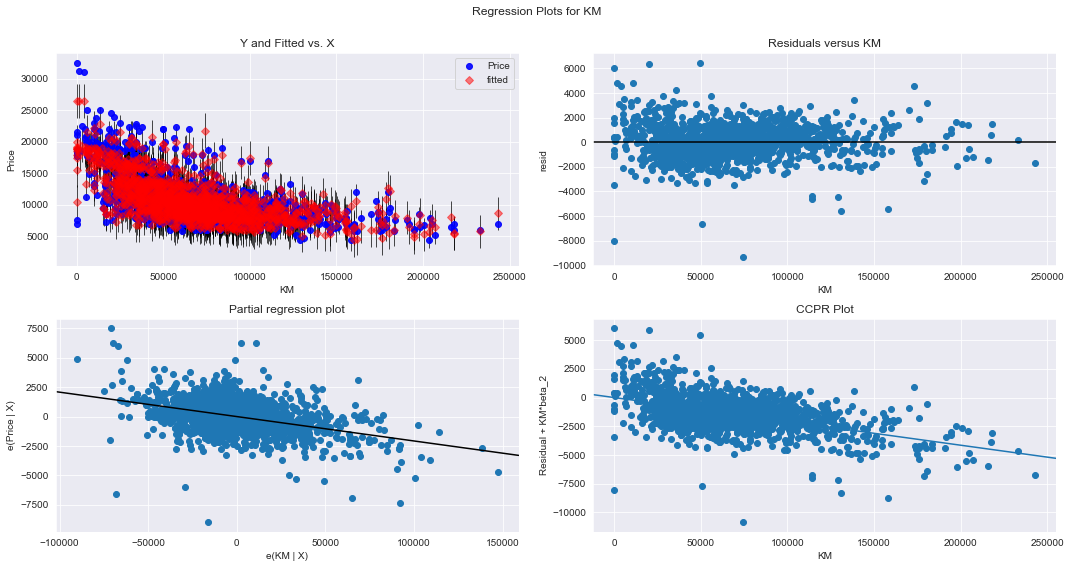

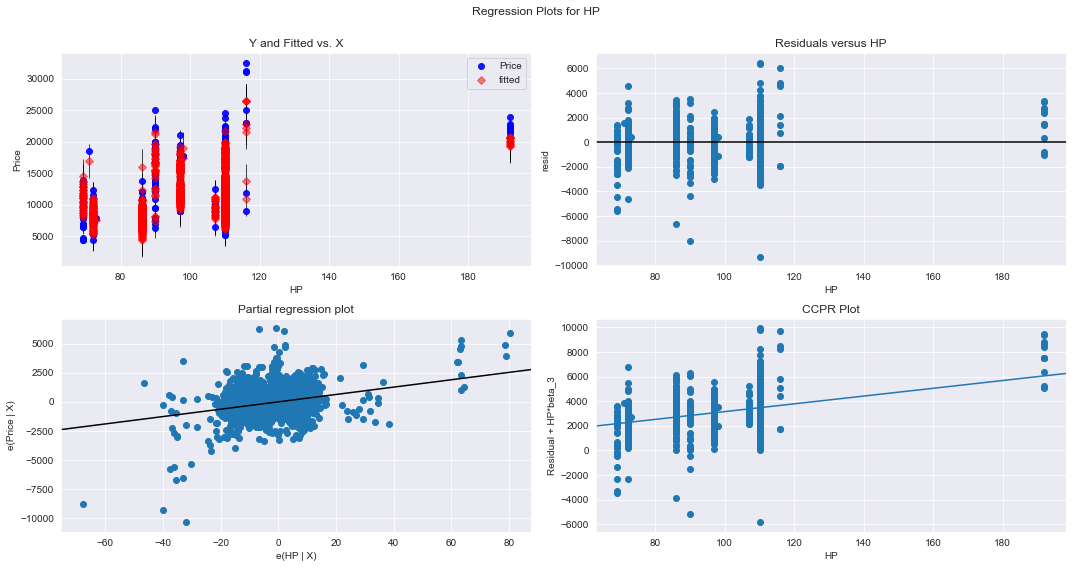

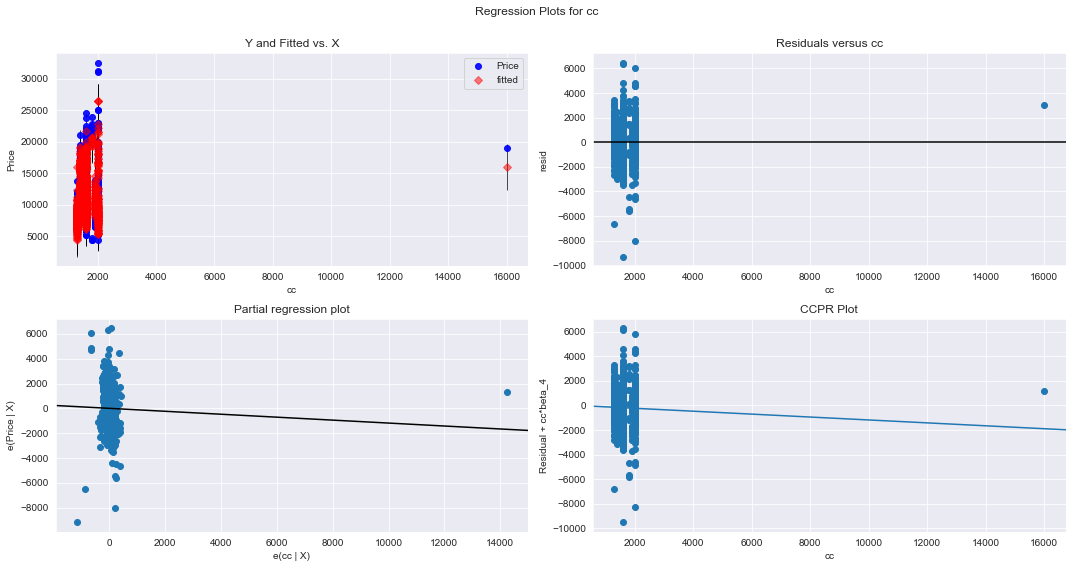

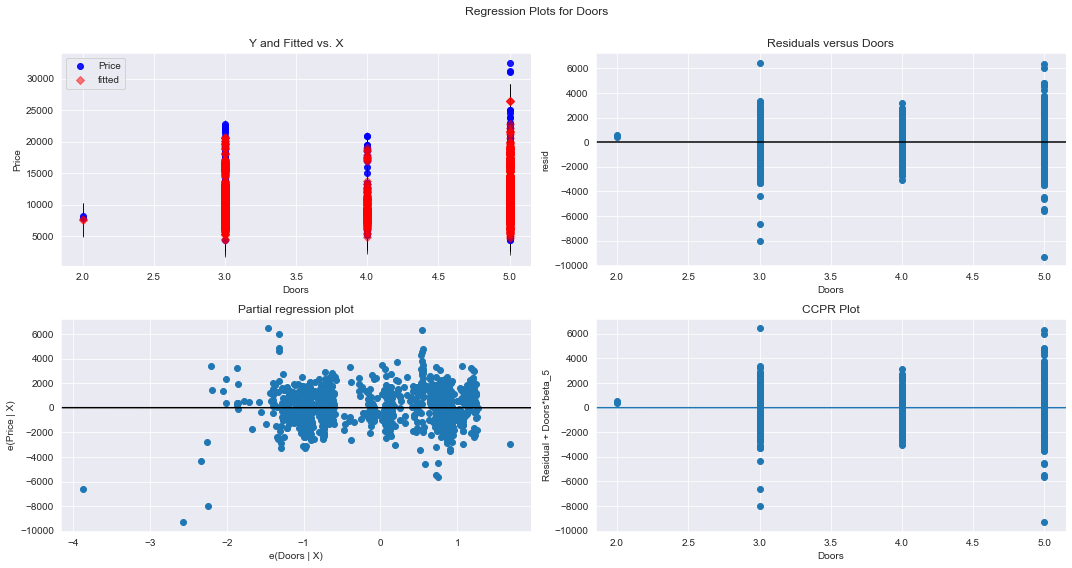

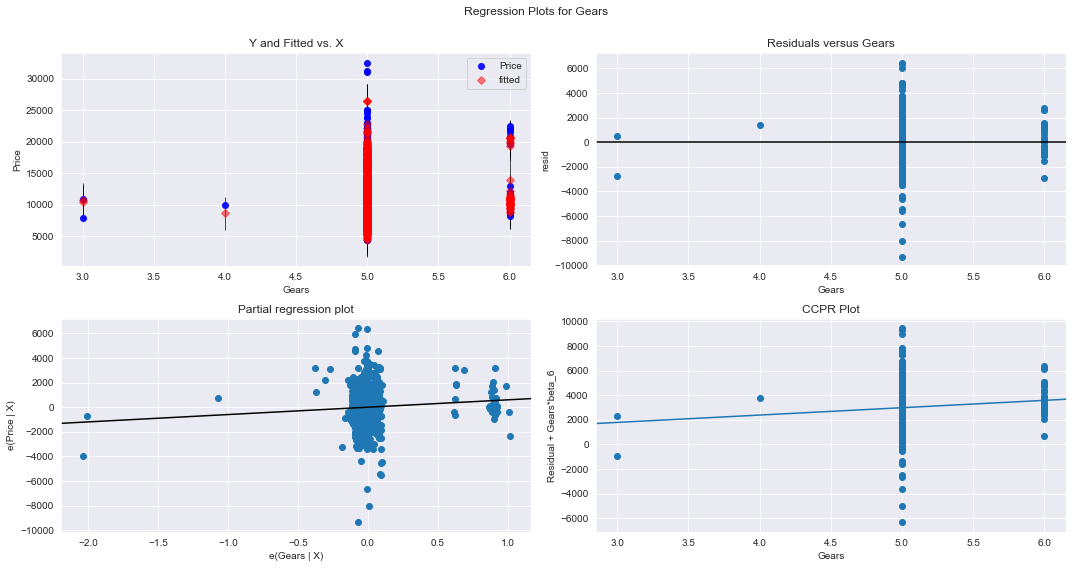

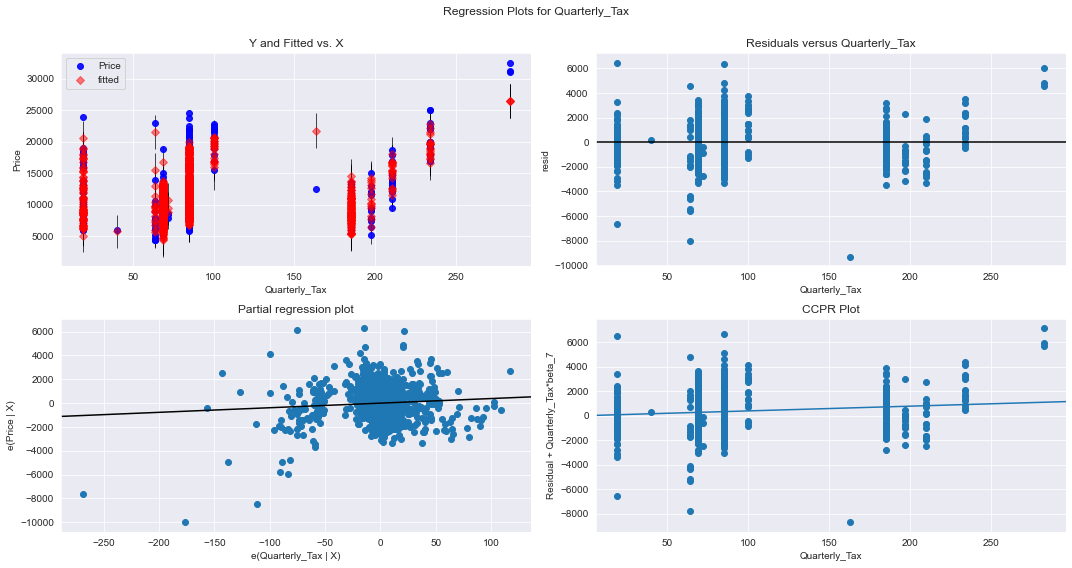

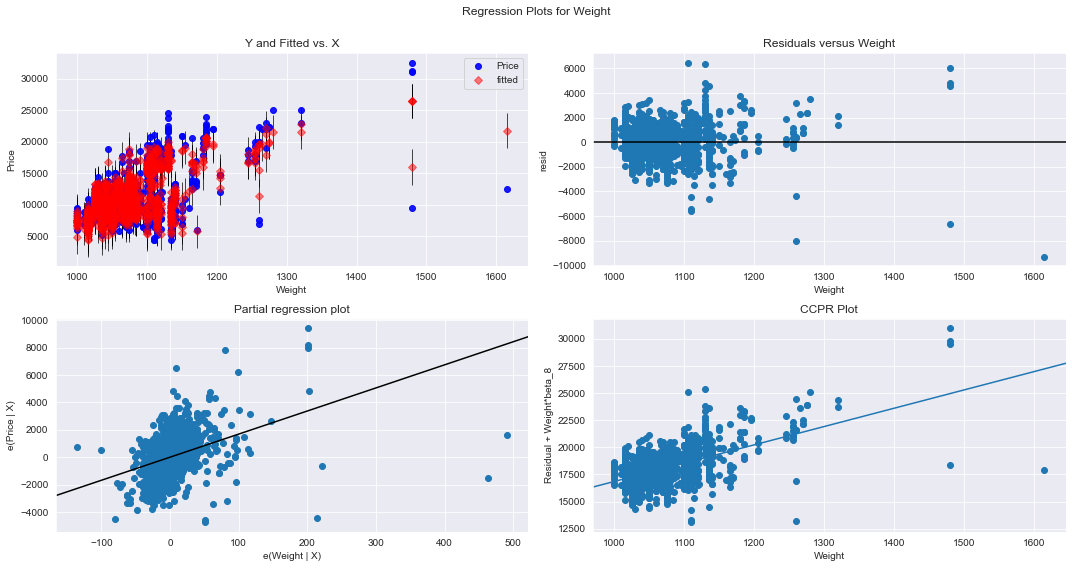

In [50]:
for i in range(1, len(Co.columns)):
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, "{}".format(Co.columns[i]), fig=fig)
    plt.show()
    

### From the error vs feature varibale, there is no pattern so there is no problem.

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [51]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

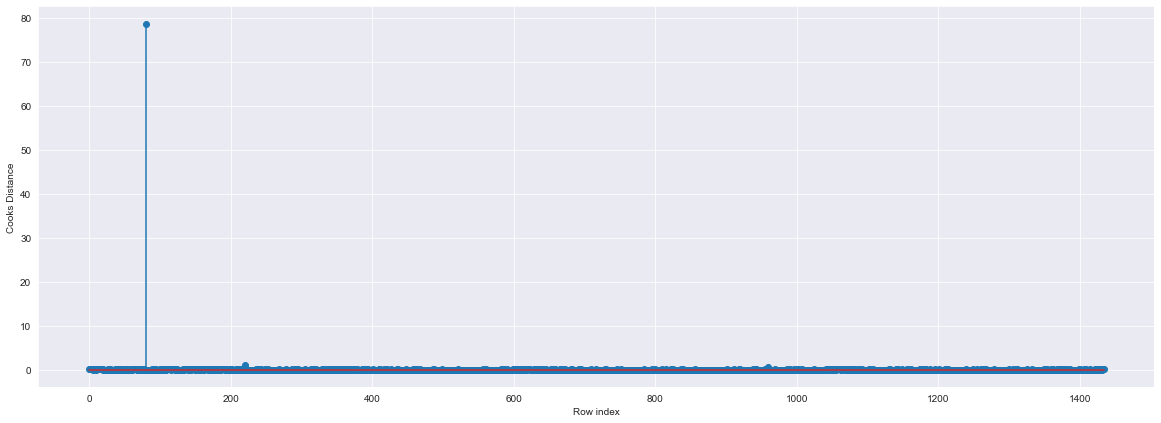

In [52]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Co)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [53]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 78.7295058224851)

### High Influence points

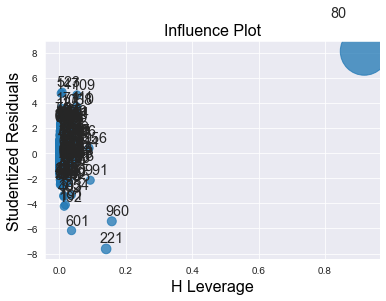

In [54]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [55]:
k = Co.shape[1]
n = Co.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [56]:
leverage_cutoff

0.020905923344947737

In [57]:
Co[Co.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


### Improving the model

In [58]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Co1=Co.drop(Co.index[[80]],axis=0).reset_index()

In [59]:
#Drop the original index
Co1=Co1.drop(['index'],axis=1)

In [60]:
Co1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [61]:
#Build model
import statsmodels.formula.api as smf 
model1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Co1).fit()

In [62]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.8681163912634053, 0.867375992056463)

In [63]:

while np.max(c)>0.5 :
    model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Co1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    Co1=Co1.drop(Co1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    Co1
else:
    final_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Co1).fit()
    final_model.rsquared , final_model.aic
    print("Improved model accuracy  :",final_model.rsquared)

Improved model accuracy  : 0.8882395145171204


### We improved the model R^2 value to 0.88, which is more close to the 1.

 ### Model Predictions

In [64]:
new_data=pd.DataFrame({'Age_08_04':12,"KM":40000,"HP":80,"cc":1300,"Doors":4,"Gears":5,"Quarterly_Tax":69,"Weight":1012}, index=[0])
new_data

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,12,40000,80,1300,4,5,69,1012


In [65]:
# Manual Prediction of Price
final_model.predict(new_data)

0    14341.570181
dtype: float64